In [1]:
# Import necessary libraries
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the JSON file
results_file = "evaluation_results.json"
with open(results_file, 'r') as f:
    data = json.load(f)

In [3]:
# Convert JSON into a more structured format
models_data = []
for model in data['models']:
    model_name = model['model_name']
    for checkpoint in model['checkpoint']:
        checkpoint_name = checkpoint['model_checkpoint']
        for dataset in checkpoint['val_datasets']:
            dataset_name = dataset['dataset_name']
            metrics = dataset['metrics']
            num_samples = dataset['num_samples']
            models_data.append({
                "model_name": model_name,
                "checkpoint": checkpoint_name,
                "dataset": dataset_name,
                **metrics,
                "num_samples": num_samples
            })

In [4]:
# Create a DataFrame for easier handling
df = pd.DataFrame(models_data)

In [5]:
# Static Plot: MACER@BPCER by Dataset for Each Model
def static_plot():
    """
    Generates a bar chart of MACER@BPCER by dataset for each model.
    Only resnet18 checkpoints are renamed to reflect resolution differences.
    """
    # Update checkpoint names only for resnet18
    df['checkpoint'] = df.apply(
        lambda row: 'high_res_img' if row['model_name'] == 'resnet18' and row['checkpoint'] == 'model_epoch_5.pth' else
                    'low_res_img' if row['model_name'] == 'resnet18' and row['checkpoint'] == 'model_epoch_4.pth' else 
                    row['checkpoint'],
        axis=1
    )

    # Combine model_name and checkpoint for easier plotting
    df['model_checkpoint'] = df['model_name'] + " (" + df['checkpoint'] + ")"

    # Filter only numeric columns
    numeric_cols = ['macer_at_bpcer']
    grouped = df.groupby(["model_checkpoint", "dataset"])[numeric_cols].mean()

    # Unstack for plotting
    macer_data = grouped['macer_at_bpcer'].unstack()

    # Plot
    macer_data.plot(kind='bar', figsize=(12, 6), alpha=0.8, edgecolor='black')
    plt.title("MACER@BPCER by Dataset for Each Model", fontsize=16)
    plt.ylabel("MACER@BPCER", fontsize=14)
    plt.xlabel("Model and Checkpoint", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

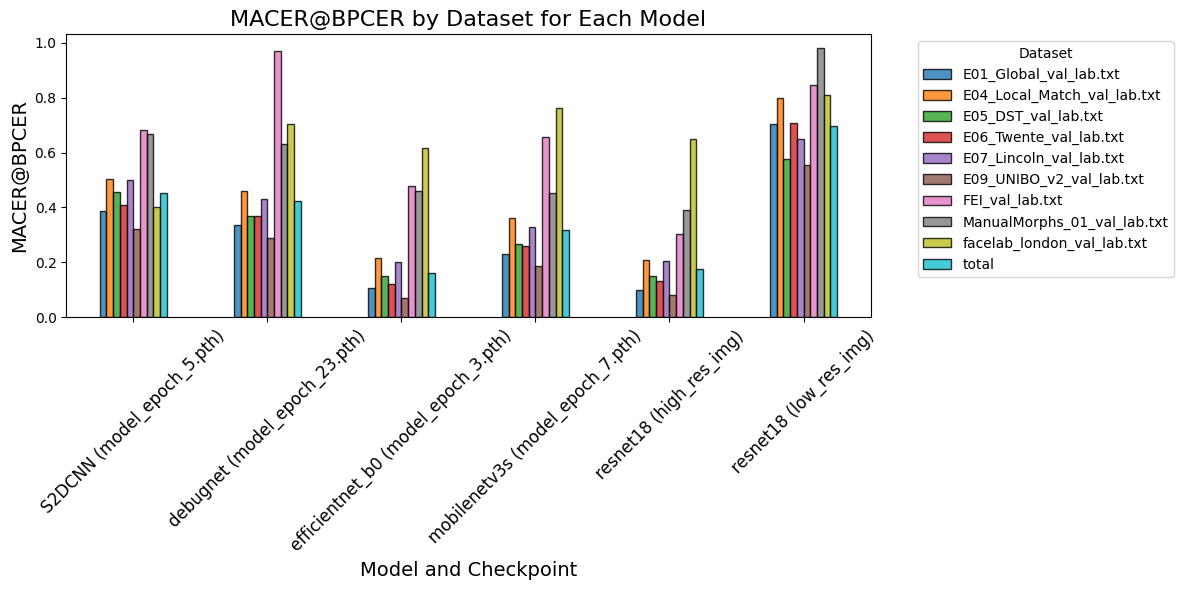

In [6]:
static_plot()

In [7]:
# Static Plot: All Metrics by Model for Total Dataset
def static_plot_total():
    """
    Generates a bar chart of all metrics for each model, focusing only on the 'total' dataset.
    Only resnet18 checkpoints are renamed to reflect resolution differences.
    """
    # Update checkpoint names only for resnet18
    df['checkpoint'] = df.apply(
        lambda row: 'high_res_img' if row['model_name'] == 'resnet18' and row['checkpoint'] == 'model_epoch_5.pth' else
                    'low_res_img' if row['model_name'] == 'resnet18' and row['checkpoint'] == 'model_epoch_4.pth' else 
                    row['checkpoint'],
        axis=1
    )

    # Combine model_name and checkpoint for easier plotting
    df['model_checkpoint'] = df['model_name'] + " (" + df['checkpoint'] + ")"

    # Filter for the 'total' dataset
    total_data = df[df['dataset'] == 'total']

    # Metrics to plot
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'macer', 'bpcer', 'macer_at_bpcer']

    # Group by model_checkpoint and compute the mean for the total dataset
    metric_data = total_data.groupby("model_checkpoint")[metrics].mean()

    # Plot
    metric_data.plot(kind='bar', figsize=(12, 6), alpha=0.8, edgecolor='black')
    plt.title("All Metrics by Model and Checkpoint for Total Dataset", fontsize=16)
    plt.ylabel("Metric Value", fontsize=14)
    plt.xlabel("Model and Checkpoint", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


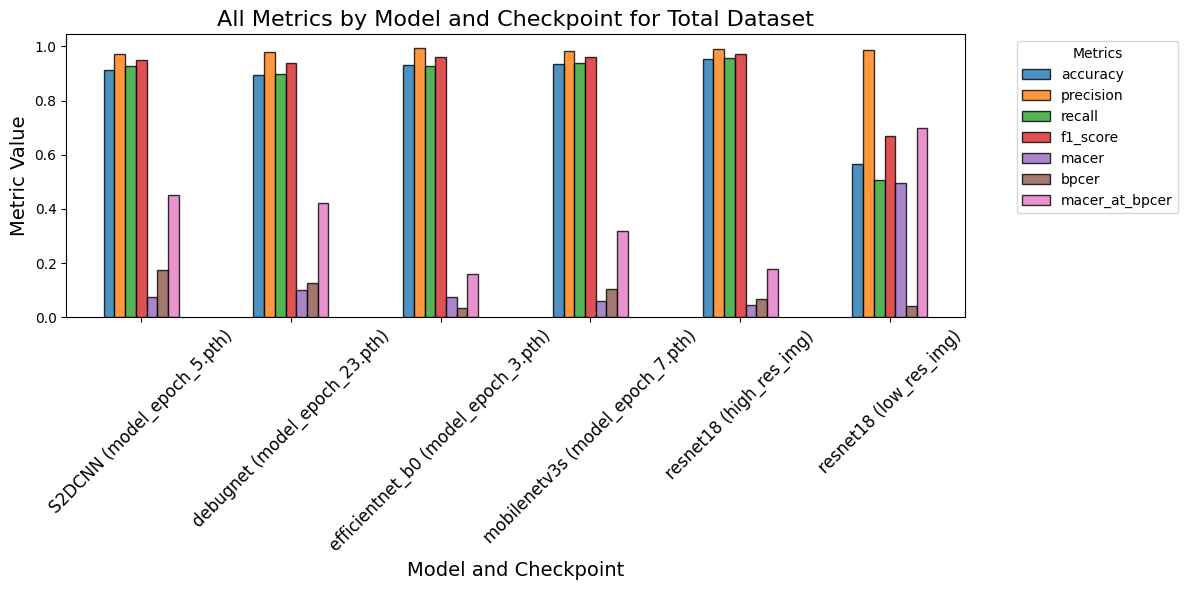

In [8]:
# Call the function
static_plot_total()

In [9]:
# Plot: Compare Accuracy Across Checkpoints for resnet18
def compare_accuracy_resnet18():
    """
    Generates a bar chart comparing accuracy for the two resnet18 checkpoints (high_res_img and low_res_img).
    """
    # Rename checkpoints for clarity
    df['checkpoint'] = df.apply(
        lambda row: 'high_res_img' if row['checkpoint'] == 'model_epoch_5.pth' else 
                    'low_res_img' if row['checkpoint'] == 'model_epoch_4.pth' else 
                    row['checkpoint'], 
        axis=1
    )

    # Filter data for resnet18
    resnet_data = df[df['model_name'] == 'resnet18']

    # Pivot the data for plotting
    accuracy_data = resnet_data.pivot(index='dataset', columns='checkpoint', values='accuracy')

    # Plot
    accuracy_data.plot(kind='bar', figsize=(12, 6), alpha=0.8, edgecolor='black')
    plt.title("Accuracy Comparison for resnet18", fontsize=16)
    plt.ylabel("Accuracy", fontsize=14)
    plt.xlabel("Dataset", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title="Images Resolution", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


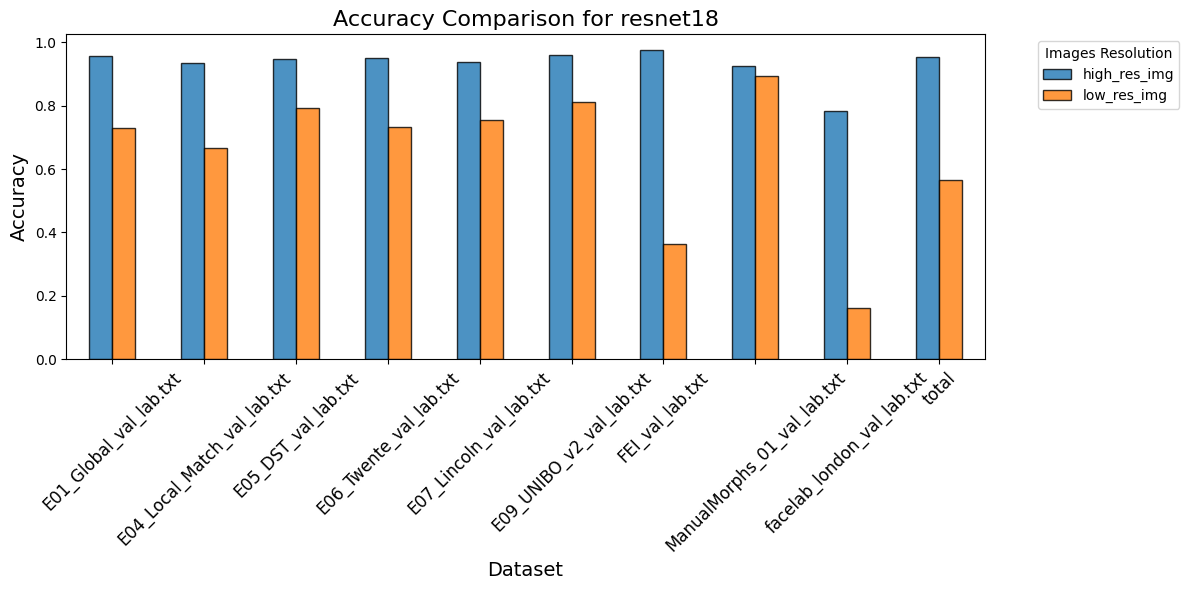

In [10]:
# Call the function
compare_accuracy_resnet18()

In [11]:
# Plot: Compare MACER@BPCER Across Checkpoints for resnet18
def compare_macer_resnet18():
    """
    Generates a bar chart comparing MACER@BPCER for the two resnet18 checkpoints (high_res_img and low_res_img).
    """
    # Rename checkpoints for clarity
    df['checkpoint'] = df.apply(
        lambda row: 'high_res_img' if row['checkpoint'] == 'model_epoch_5.pth' else 
                    'low_res_img' if row['checkpoint'] == 'model_epoch_4.pth' else 
                    row['checkpoint'], 
        axis=1
    )

    # Filter data for resnet18
    resnet_data = df[df['model_name'] == 'resnet18']

    # Pivot the data for plotting
    macer_data = resnet_data.pivot(index='dataset', columns='checkpoint', values='macer_at_bpcer')

    # Plot
    macer_data.plot(kind='bar', figsize=(12, 6), alpha=0.8, edgecolor='black')
    plt.title("MACER@BPCER Comparison for resnet18", fontsize=16)
    plt.ylabel("MACER@BPCER", fontsize=14)
    plt.xlabel("Dataset", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title="Images Resolution", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

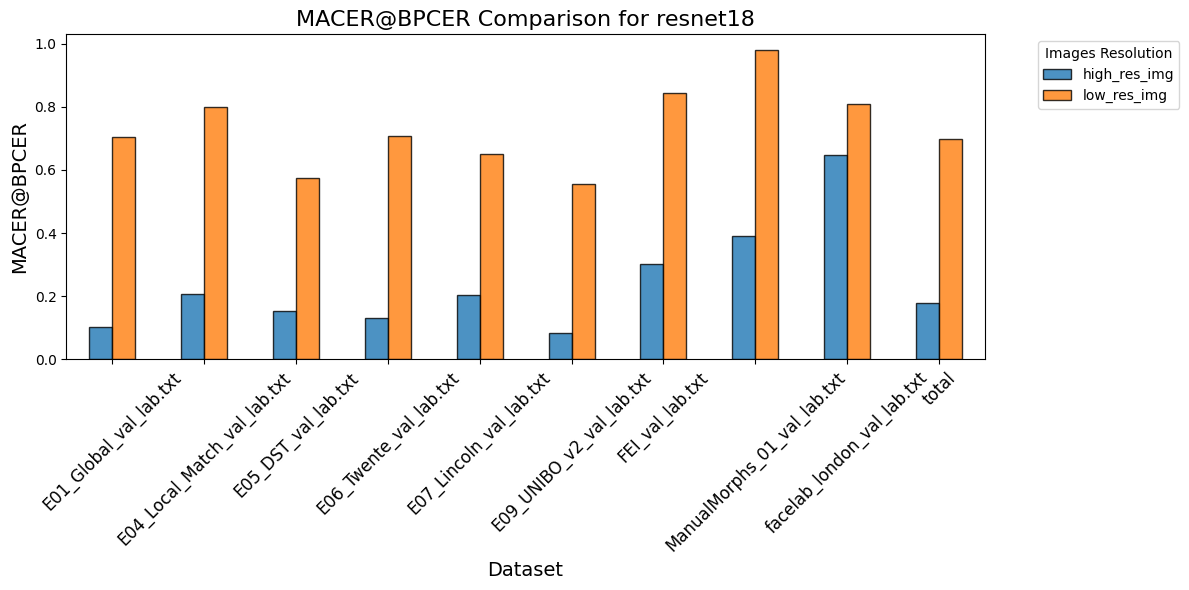

In [12]:
# Call the function
compare_macer_resnet18()